## Goal
wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

## Key points
1. You only want original ratings (no retweets) that have images. 
2. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 quality issues in this dataset.
3. Cleaning includes merging individual pieces of data according to the rules of tidy data.
4. **The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.**
5. You do *not* need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gathering data

In [390]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
from matplotlib import pyplot as plt

#Gathering data; web scraping

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

wb： write as binary

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [391]:
#use read_csv to read tsv file

image_predic = pd.read_csv('image_predictions.tsv', sep = '\t')

配置api，官方提供的网站内部数据的下载接口。

In [392]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

tweet_ids = twitter_archive.tweet_id
tweet_json = []
for tweet_id in tweet_ids:
    try:
        status = api.get_status(tweet_id, tweet_mode='extended', 
                                wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        json_file = json.dumps(status._json)
        tweet_json.append(json_file)
    except :
        print(tweet_id,'deleted')

In [393]:
# 解析每一行的json， 使用json.loads
# json.loads(json_df[1][1]) 解析第一行的数据
# 把过程写成循环
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_json, file)

In [394]:
json_data = pd.read_json('tweet_json.txt')

change json_data into tweet ID, retweet count, and favorite count dataframe

In [395]:
info = ['id', 'retweet_count', 'favorite_count']

In [396]:
tweet_data = pd.DataFrame(columns=info)

In [397]:
# json.loads(json_data[0][0])

In [398]:
index = 0
for one_line_json in json_data[0]:
    info_data = json.loads(one_line_json)
    info_data = [info_data[key] for key in info]
    tweet_data = tweet_data.append(pd.DataFrame(dict(zip(info, info_data)), index=[index]))
    index = index + 1

In [399]:
tweet_data

,favorite_count,id,retweet_count
0,38966,892420643555336193,8639
1,33353,892177421306343426,6349
2,25141,891815181378084864,4213
3,42302,891689557279858688,8758
4,40472,891327558926688256,9521
5,20295,891087950875897856,3155
6,11900,890971913173991426,2103
7,65822,890729181411237888,19154
8,27880,890609185150312448,4321
9,32077,890240255349198849,7520


# Assess Data

In [400]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [401]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [402]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

Quality
1. 缺失值
2. 无效值
3. 不合理值
4. 不一致

1. reply和retweet相关条目缺失。
2. id类的都应该是字符串
3. denominator应该全部都为10
4. timestamp应该是时间类型
5. ？expanded url无用数据，大部分是无效网址
6. retweet转发数据是无用的，会随时间变化
7. in reply回复数据是无用的，会随时间变化
8. name里面存在不合理值，开头小写的都不是狗的名字，需要替换

Tideness
1. 把变量名作为了列名，应该用stage作为列名，doggo，floofer，pupper，puppo是不同状态。
2. 三个表格有重合部分可以合并。

In [403]:
image_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [404]:
image_predic.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False
1068,715928423106027520,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,French_bulldog,0.019663,True,bull_mastiff,0.002278,True
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True
1862,842765311967449089,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1,tub,0.665238,False,bucket,0.105166,False,Labrador_retriever,0.029340,True


In [405]:
image_predic.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [406]:
image_predic[image_predic.p1_dog == False][image_predic.p2_dog == False][image_predic.p3_dog == False]

/Users/mintking/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


Quality
1. tweet id应该是字符串
2. ?p1 p2 p3判定都为False的值可以当作不是狗删除
Tideness


In [407]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null object
id                2345 non-null object
retweet_count     2345 non-null object
dtypes: object(3)
memory usage: 73.3+ KB


## Issue 1
## Define
twitter_archive表格中in_reply_to_status_id和in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id和retweeted_status_timestamp有缺失值，所以应该删去

## Code

In [408]:
# make a duplication of original dataset
twitter_archive_clean = twitter_archive.copy()

In [409]:
twitter_archive_clean = twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

## Test

In [410]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Issue 2
## Define
twitter_archive表格中tweet_id是整数格式，应该改成字符串格式。

## Code

In [411]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.apply(str)

## test

In [412]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(10)
memory usage: 221.0+ KB


## Issue 3
## Define
twitter_archive表格中timestamp是字符串格式,应该改为时间格式。

In [413]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

## Test

In [414]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


## Issue 4
## Define
对于twitter_archive表格中rating_denominator，狗狗评分的分母都应该是10，对于分母不是10的数据认为是不符合规定的，应该删除。

## Code

In [415]:
twitter_archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [416]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator==10]

## Test

In [417]:
twitter_archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

## Issue 5
## Define
twitter_archive表格中对狗狗打分的分子的记录是有错误的，其中9.75被记录为了75，11.26被记录为了26，11.27被记录为了27，需要进行改正。

In [418]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
9       156
8       102
14       54
7        54
5        37
6        32
3        19
4        15
2         9
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

In [419]:
twitter_archive_clean[twitter_archive_clean.rating_numerator>17].text.values

array([ '@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
       '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
       '@markhoppus 182/10',
       "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
       "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
       "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
       "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
       'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
       'After so many requests... here you go.\n\nGood dogg. 

In [420]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.apply(float)

In [421]:
twitter_archive_clean.rating_numerator.replace(to_replace=75, value=9.75, inplace=True)

In [422]:
twitter_archive_clean.rating_numerator.replace(to_replace=26, value=11.26, inplace=True)

In [423]:
twitter_archive_clean.rating_numerator.replace(to_replace=27, value=11.27, inplace=True)

## Test

In [424]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      558
11.00      463
10.00      461
13.00      351
9.00       156
8.00       102
7.00        54
14.00       54
5.00        37
6.00        32
3.00        19
4.00        15
2.00         9
1.00         8
0.00         2
9.75         2
15.00        2
420.00       2
17.00        1
11.27        1
666.00       1
11.26        1
1776.00      1
182.00       1
Name: rating_numerator, dtype: int64

In [425]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2278 non-null object
rating_numerator      2333 non-null float64
rating_denominator    2333 non-null int64
name                  2333 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 236.9+ KB


## Issue 6
## Define
twitter_archive表格中expanded_urls表示了该条Twitter的原始网页，网页上的信息已经被包含在第三个表格tweet_data当中，所以可以删去这一条信息。

## Code

In [426]:
twitter_archive_clean = twitter_archive_clean.drop(['expanded_urls'],axis = 1)

## Test

In [427]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
rating_numerator      2333 non-null float64
rating_denominator    2333 non-null int64
name                  2333 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 218.7+ KB


## Issue 7·
## Define
在twitter_archive表格中，rating_numerator是浮点型，所以为了保持一致性，应该把rating_denominator也改成浮点型。

## Code

In [428]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.apply(float)

## Test

In [429]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
rating_numerator      2333 non-null float64
rating_denominator    2333 non-null float64
name                  2333 non-null object
doggo                 2333 non-null object
floofer               2333 non-null object
pupper                2333 non-null object
puppo                 2333 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 218.7+ KB


## Issue 8
## Define
在twitter_archive表中狗狗名字name信息中有一些是小写字母开头，这些是错误信息。

In [430]:
names = twitter_archive_clean.name.unique()

In [431]:
for name in names:
    if name[0] in 'abcdefghijklmnopqrstuvwxyz':
        print(name)

such
a
quite
not
one
incredibly
mad
an
very
just
my
his
actually
getting
unacceptable
all
old
infuriating
the
by
officially
life
light
space


In [432]:
# 替换这些名字
twitter_archive_clean.name = twitter_archive_clean.name.replace(regex=r"(^[a-z])", value='None')

## Test

In [433]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Noneuch', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Noneuite', 'Dewey', 'Scout', 'Gizmo',
       'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 

## Issue 9
## Define
在第二个表格image_predic中，tweet_id是整数格式，应该改为字符串格式。

## Code

In [434]:
image_predic_clean = image_predic.copy()

In [435]:
image_predic_clean.tweet_id = image_predic.tweet_id.apply(str)

## Test

In [436]:
image_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Issue 10
## Define
第二个表格image_predic中的img_num仅体现了该用户发的照片数量，可以删去这个信息。

## Code

In [437]:
image_predic_clean = image_predic_clean.drop(['img_num'],axis = 1)

## Test

In [438]:
image_predic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


## Issue 11
## Define
在第一个表格twitter_archive中dog stage分成四列给出，可以合并为一列，方便分析。

## Code

In [439]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [440]:
def select_dog_stage(oneline):
    dogStage = ['doggo', 'floofer', 'pupper', 'puppo']
    for stage in [oneline[key] for key in dogStage]:
        if stage != 'None':
            return stage
    return 'None'

In [441]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.apply(select_dog_stage, axis=1)

In [442]:
twitter_archive_clean = twitter_archive_clean.drop(['pupper','doggo','puppo','floofer'],axis=1)

## Test

In [443]:
twitter_archive_clean.dog_stage.value_counts()

None       1953
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [444]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns]
source                2333 non-null object
text                  2333 non-null object
rating_numerator      2333 non-null float64
rating_denominator    2333 non-null float64
name                  2333 non-null object
dog_stage             2333 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 164.0+ KB


## Issue 12
## Define
在第三个表格tweet_data中，点赞数favorite_count和转发数retweet_count是字符串格式，应该改为整数型。

## Code

In [445]:
tweet_data_clean = tweet_data.copy()

In [446]:
tweet_data_clean.favorite_count = tweet_data_clean.favorite_count.apply(int)

In [447]:
tweet_data_clean.retweet_count = tweet_data_clean.retweet_count.apply(int)

## Test

In [448]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
id                2345 non-null object
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


## Issue 13
## Define
在表格twee_data中应该将id改为tweet_id，与其他表格保持一致。

In [449]:
tweet_data_clean = tweet_data_clean.rename(columns={'id':'tweet_id'})

## Test

In [450]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
favorite_count    2345 non-null int64
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


## Issue 14
## define
三个表格都是以tweet_id作为第一列，所以可以将tweet_id作为主键，将三个表格合并为一个表格。

## Code

In [451]:
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.apply(str)

In [452]:
tweet_data_clean.tweet_id.values

array(['892420643555336193', '892177421306343426', '891815181378084864',
       ..., '666033412701032449', '666029285002620928',
       '666020888022790149'], dtype=object)

In [453]:
final_data = pd.merge(twitter_archive_clean, tweet_data_clean,on='tweet_id', how='inner')

In [454]:
image_predic_clean.tweet_id = image_predic_clean.tweet_id.apply(str)

In [455]:
final_data.tweet_id.sample()

240    845812042753855489
Name: tweet_id, dtype: object

In [456]:
image_predic_clean.tweet_id.sample()

226    670361874861563904
Name: tweet_id, dtype: object

In [457]:
final_data = final_data.merge(image_predic_clean, on='tweet_id')

In [458]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 20 columns):
tweet_id              2051 non-null object
timestamp             2051 non-null datetime64[ns]
source                2051 non-null object
text                  2051 non-null object
rating_numerator      2051 non-null float64
rating_denominator    2051 non-null float64
name                  2051 non-null object
dog_stage             2051 non-null object
favorite_count        2051 non-null int64
retweet_count         2051 non-null int64
jpg_url               2051 non-null object
p1                    2051 non-null object
p1_conf               2051 non-null float64
p1_dog                2051 non-null bool
p2                    2051 non-null object
p2_conf               2051 non-null float64
p2_dog                2051 non-null bool
p3                    2051 non-null object
p3_conf               2051 non-null float64
p3_dog                2051 non-null bool
dtypes: bool(3), datetime64[

In [459]:
final_data.to_csv('twitter_archive_master.csv')

In [462]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', index_col=[0])

# Insights and visualization

In [468]:
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
count,2.051000e+03,2051.000000,2051.0,2051.000000,2051.000000,2051.000000,2.051000e+03,2.051000e+03
mean,7.383097e+17,11.654939,10.0,8568.668454,2887.498781,0.594672,1.349422e-01,6.022921e-02
std,6.781522e+16,40.070827,0.0,12499.343305,4878.868291,0.271257,1.008930e-01,5.082182e-02
min,6.660209e+17,0.000000,10.0,0.000000,13.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.762505e+17,10.000000,10.0,1634.000000,615.000000,0.363683,5.388625e-02,1.605405e-02
50%,7.117438e+17,11.000000,10.0,3815.000000,1367.000000,0.588230,1.187690e-01,4.934910e-02
75%,7.931732e+17,12.000000,10.0,10836.000000,3363.000000,0.843855,1.963605e-01,9.203645e-02
max,8.924206e+17,1776.000000,10.0,143944.000000,77713.000000,1.000000,4.880140e-01,2.710420e-01


## Insight 1
- 狗狗评分的平均数为11.65，但由于有较大的异常值（如1776），所以参考平均数不够准确。
- 评分的中位数为11，上下四分位数分别为10和12，说明主人给狗狗的评分大多集中在10到12的区间内。

## Insight 2
- 参考p1_conf，对狗的图片的识别置信度平均数为0.59，最高可达到1.

In [469]:
twitter_archive_master[twitter_archive_master.favorite_count>140000]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
325,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,143944,49402,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


## Insight 3
点赞数最高的狗的照片是：
![dog](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

## visualization

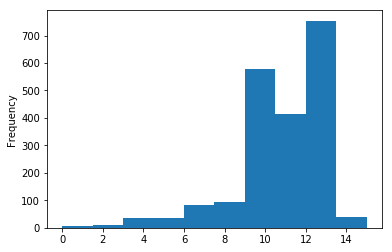

In [479]:
twitter_archive_master[twitter_archive_master.rating_numerator<18]['rating_numerator'].plot(kind='hist')

选取去除异常值之后的数据作图，可以看到主人对狗狗的评分大多集中在10到12分之间。